## Final Project Submission

Please fill out:
* Student name: Joshua Thomas
* Student pace: self paced / *part time* / full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


### Importing the Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import quickfunctions as qf
from sklearn.model_selection import train_test_split #Split the data into test/train portions and fit model to smaller sample
from mpl_toolkits.mplot3d import Axes3D

### Load the dataset and perform initial analysis
In this dataset, there are 20 different columns (potential features) to build a model from.

In [14]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Quick Notes on Data Set
* Waterfront has some NaN and zero values, will want to convert these to binary values.
* May want to drop lat/long when building the model.
* See if there is a data dictionary for this data set.
* May want transform zipcode into categorical data type.

* Will want to categorize 'condition, grade, floors' columns. 
* May want to categorize Year Column into different decades.
* Will want to convert sqft_basement to float
* Will want to convert any column that doens't necessarily need to be a float to an integer
* Drop ID's in data set to avoid skewing model.
* There are some columns that are of the 'object' data type. Cast these appropriately
* Convert appropriate values to integers

In [4]:
housing_data.drop('sqft_basement', inplace=True, axis=1) #Contained missing values as well. Also, other more "relevant features were decided upon"
housing_data.drop('yr_renovated', inplace=True, axis=1) #Many values are already 0 and there are a few missing. Will drop this column.
housing_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,1963,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,47.3684,-122.031,2390,7570


* For the Waterfront Column, set NaN values to zero to signify that there is no water front.
* For View, also set NaN columns equal to zero.
    * Can accomplish this using _pd.fillna()_ or writing for loop to iterate

In [25]:
features = housing_data.columns
housing_data[housing_data['condition']  == '?']
# housing_data[features].hist(figsize=(10,8), layout=(4,5))
# housing_data.isna().sum(), housing_data.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Cleaning the Data
Start with evaluating which variables can be transformed into categorical
* Converted Waterfront and Grade.
* Working to use this data for modeling a general price estimate of houses given the features.
* Filling Waterfront, view NaN's with zeros
* There are some columns that have ? as data in the rows. Need to clean these as well.

In [6]:
housing_data['waterfront'].fillna(0, inplace=True) #Filling with zeros if NaN. Avoids inflating price.
housing_data['view'].fillna(0, inplace=True) #Filling with zeros if NaN. Avoids inflating price.

housing_data['price'] = housing_data['price'].astype(int)

waterfront_cat = pd.get_dummies(housing_data['waterfront'], prefix='waterfront')
view_cat = pd.get_dummies(housing_data['view'], prefix='view')
grade_cat = pd.get_dummies(housing_data['grade'], prefix='grade')
bath_cat = pd.get_dummies(housing_data['bathrooms'], prefix='bath')
floors_cat = pd.get_dummies(housing_data['floors'], prefix='floor')
bed_cat = pd.get_dummies(housing_data['bedrooms'], prefix='bed')
zip_cat = pd.get_dummies(housing_data['zipcode'], prefix='zip')
cond_cat = pd.get_dummies(housing_data['condition'], prefix='cond')
yr_cat = pd.get_dummies(housing_data['yr_built'], prefix='yr')

housing_data = pd.concat([housing_data, waterfront_cat, grade_cat, view_cat, bath_cat, floors_cat, bed_cat, zip_cat, cond_cat], axis=1)
housing_data.set_index(keys='id')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cond_1,cond_2,cond_3,cond_4,cond_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,0,0
6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0,0,0,1,0,0,0,1,0,0
2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0


### Taking a look at correlation
* Checking which features have high correlation, looking specifically in my case at the price column for modeling
* Write function to automatically return true values
* Function to get correlations is built in QuickFuncs package/module

In [7]:
corr_dict = qf.QuickFuncs.get_correlations(housing_data, 0.5)
# housing_data.corr()
corr_dict #This is a quick way to check if any of the potential predictor variables have multicollinearity issues.

[{'id': Index(['id'], dtype='object')},
 {'price': Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
         'sqft_living15'],
        dtype='object')},
 {'bedrooms': Index(['bedrooms', 'bathrooms', 'sqft_living'], dtype='object')},
 {'bathrooms': Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
         'sqft_above', 'yr_built', 'sqft_living15', 'floor_2.0'],
        dtype='object')},
 {'sqft_living': Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
         'sqft_living15'],
        dtype='object')},
 {'sqft_lot': Index(['sqft_lot', 'sqft_lot15'], dtype='object')},
 {'floors': Index(['bathrooms', 'floors', 'sqft_above', 'floor_2.0'], dtype='object')},
 {'waterfront': Index(['waterfront', 'waterfront_1.0', 'view_4.0'], dtype='object')},
 {'view': Index(['view', 'view_3.0', 'view_4.0'], dtype='object')},
 {'condition': Index(['condition', 'cond_4', 'cond_5'], dtype='object')},
 {'grade': Index(['price', 'bathroom

### Scaling and Normalizing Features
Features to Scale/Normalize: Sq.Ft, Price

In [8]:
scaled_price = np.log(housing_data['price'])
price = housing_data['price']
condition = np.log(housing_data['condition'])
scaled_living = np.log(housing_data['sqft_living'])
scaled_lot = np.log(housing_data['sqft_lot'])
scaled_above = np.log(housing_data['sqft_above'])

## What are the most important features that influence home price?
* Extracted highly correlated variables
* Check distrbutions of features
* Check for multicollinearity in features
* See if any features need to be adjusted.

In [9]:
features = pd.DataFrame([], index=[])

#Living/Lot size are highly correlated, but leaving them both in as they both influence the price heavily. 
features['scaled_living'] = scaled_living
features['scaled_lot'] = scaled_lot


features = pd.concat([features, zip_cat, waterfront_cat, yr_cat, cond_cat, bed_cat], axis=1)
features.drop(['waterfront_0.0'], axis=1, inplace=True)

#Normalize/Scale features for prices
#Grades need to be turned in to Categorical Variable

### Begin Modeling Data

In [10]:
features_const = sm.add_constant(features)
model = sm.OLS(scaled_price, features_const).fit()

C:\Users\Jthom\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     617.9
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        19:06:15   Log-Likelihood:                 3962.3
No. Observations:               21597   AIC:                            -7519.
Df Residuals:                   21394   BIC:                            -5899.
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2579      0.037    140.814      0.000       5.185       5.331
scaled_living      0.6750      0.005    123.901      0.000       0.664       0.686
scaled_lot         0.1015      0.002     43.067      0.000       0.097       0.106
zip_98001         -0.4631      0.011    -43.143      0.000      -0.484      -0.442
zip_98002         -0.4799      0.014    -33.415      0.000      -0.508      -0.452
zip_98003         -0.3813      0.012    -31.345      0.000      -0.405      -0.357
zip_98004          0.8091      0.012     69.642      0.000       0.786       0.832
zip_98005          0.3989      0.016     25.346      0.000       0.368       0.430
zip_98006          0.3464      0.009     36.964      0.000       0.328       0.365
zip_98007          0.3074      0.017     17.964      0.000       0.274       0.341
zip_98008          0.3103      0.012     25.182      0.000       0.286       0.334
zip_98010         -0.2648      0.020    -13.009      0.000      -0.305      -0.225
zip_98011          0.0317      0.014      2.187      0.029       0.003       0.060
zip_98014         -0.2175      0.018    -11.781      0.000      -0.254      -0.181
zip_98019         -0.1898      0.015    -12.796      0.000      -0.219      -0.161
zip_98022         -0.4133      0.014    -30.559      0.000      -0.440      -0.387
zip_98023         -0.4243      0.009    -45.687      0.000      -0.442      -0.406
zip_98024         -0.0703      0.023     -3.082      0.002      -0.115      -0.026
zip_98027          0.0982      0.010      9.670      0.000       0.078       0.118
zip_98028         -0.0078      0.012     -0.649      0.516      -0.031       0.016
zip_98029          0.2260      0.012     19.533      0.000       0.203       0.249
zip_98030         -0.4068      0.013    -32.039      0.000      -0.432      -0.382
zip_98031         -0.3633      0.012    -29.424      0.000      -0.387      -0.339
zip_98032         -0.4260      0.018    -23.571      0.000      -0.461      -0.391
zip_98033          0.4178      0.010     42.527      0.000       0.399       0.437
zip_98034          0.1555      0.009     17.319      0.000       0.138       0.173
zip_98038         -0.3111      0.009    -35.755      0.000      -0.328      -0.294
zip_98039          1.0429      0.028     36.615      0.000       0.987       1.099
zip_98040          0.6160      0.012     49.996      0.000       0.592       0.640
zip_98042         -0.3846      0.009    -43.020      0.000      -0.402      -0.367
zip_98045         -0.1487      0.014    -10.695      0.000      -0.176      -0.121
zip_98052          0.2553      0.009     29.386      0.000       0.238       0.272
zip_98053          0.1253      0.011     11.867      0.000       0.105       0.146
zip_98055         -0.2824      0.012    -22.850      0.000      -0.307      -0.258
zip_98056   

### Details on Model
* 85% Confidence on predicting home prices in data set.
* Features selected are: Year(Categorical), Waterfront(Categorical), Zipcode(Categorical), Condition(Categorical)
    * Living Sq Ft(Numerical), Lot Size(Numerical)
* Features and data type were chosen by best interpretation of the data. Data casted as numerical was selected because the data implies that "more is better" in the fact that SQ Footage of Living/Lot Size and Higher Condition equated with higher costs.
* Features with ambiguous data(Waterfront) were set equal to 0 or 1 to signify that the potential house has a waterfront view.
    * This information could be misleading from looking at the model because some information was lost flattening to binary values.
* Zip Code appeared to have a large impact on the model.
    * Average condition of the houses in a particular Zip Code did not necessarily correlate with higher prices
    * Average Lot Size of a Zip code
* Waterfront Category contributes quite a bit to the pricing of home. Dropping the waterfront 0 column reduces the impact that this category has on the price and I believe more accurately predicts the home price without inflation.
* Year category is accurately reflected as in general, the newer the house, the more the price is increased. Outliers may affect the coefficients of the price since a house may contain more desirable features.

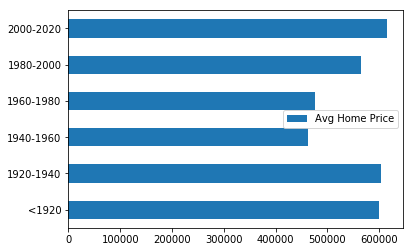

In [37]:
# est_price = list(model.predict())
# plt.figure(figsize=(12,8))
# plt.hist(housing_data['yr_built'])

#Bin the years by two decades and plot them
bin1 = housing_data[housing_data['yr_built'] <= 1920]
bin2 = housing_data[(housing_data['yr_built'] > 1920) & (housing_data['yr_built'] <= 1940)]
bin3 = housing_data[(housing_data['yr_built'] > 1940) & (housing_data['yr_built'] <= 1960)]
bin4 = housing_data[(housing_data['yr_built'] > 1960) & (housing_data['yr_built'] <= 1980)]
bin5 = housing_data[(housing_data['yr_built'] > 1980) & (housing_data['yr_built'] <= 2000)]
bin6 = housing_data[(housing_data['yr_built'] > 2000) & (housing_data['yr_built'] <= 2020)]

bin1_pmean = bin1['price'].mean()
bin2_pmean = bin2['price'].mean()
bin3_pmean = bin3['price'].mean()
bin4_pmean = bin4['price'].mean()
bin5_pmean = bin5['price'].mean()
bin6_pmean = bin6['price'].mean()

pricemean_year = pd.DataFrame([bin1_pmean, bin2_pmean, bin3_pmean, bin4_pmean, bin5_pmean, bin6_pmean], 
                              columns=['Avg Home Price'], 
                              index=['<1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000','2000-2020'])
pricemean_year = pricemean_year.astype(int)

#Show how year effects price
pricemean_year.plot(kind='barh')

## Visualizing Important Features for Price Prediction Model

In [13]:
# 5 Most Expensive Zip Code??
# Average cost per house condition?
# Best Zip Code to look for housing
# "Oldest" Zip Code

zip_count = pd.Series(list(housing_data[zip_cat.columns].sum()), name='count')
#Extracting home count per zip code. Order is preserved from categorical casting

In [14]:
zip_price = pd.DataFrame(housing_data.groupby(['zipcode'])['price'].mean().astype(int))
zip_price.reset_index(inplace=True) #Took a couple hours to fix this.... 
zip_price = pd.concat([zip_price,zip_count], axis=1)
zip_price.sort_values('price', ascending=False)

,zipcode,price,count
24,98039,2161300,50
3,98004,1356523,317
25,98040,1194873,282
48,98112,1096239,269
41,98102,899607,104
47,98109,880077,109
43,98105,863228,229
5,98006,859938,498
53,98119,849714,184
4,98005,810289,168


### Where is the best Zip Code to purchase an affordable, good condition home?
* Compare the median home price with the average conditions. Also the size of the home
* Lot size varies drastically because some areas may be more rural.


In [15]:
zip_cond = pd.DataFrame(housing_data.groupby(['zipcode'])['sqft_living', 'sqft_lot', 'price', 'condition'].mean())
zip_cond['condition'].describe()
zip_cond.sort_values(['condition', 'price'], ascending=False)

,sqft_living,sqft_lot,price,condition
zipcode,,,,
98040,3106.833333,13704.464539,1.194874e+06,3.787234
98002,1627.743719,7517.633166,2.342840e+05,3.743719
98022,1837.313305,74233.914163,3.167424e+05,3.733906
98056,2017.096059,9566.492611,4.208955e+05,3.709360
98005,2656.803571,19928.785714,8.102897e+05,3.696429
98070,1893.059829,96269.957265,4.893820e+05,3.692308
98008,2133.445230,10188.448763,6.456282e+05,3.667845
98006,2888.295181,13383.435743,8.599386e+05,3.658635
98032,1738.048000,10379.760000,2.512962e+05,3.632000
